In [1]:
#Importing libraries
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

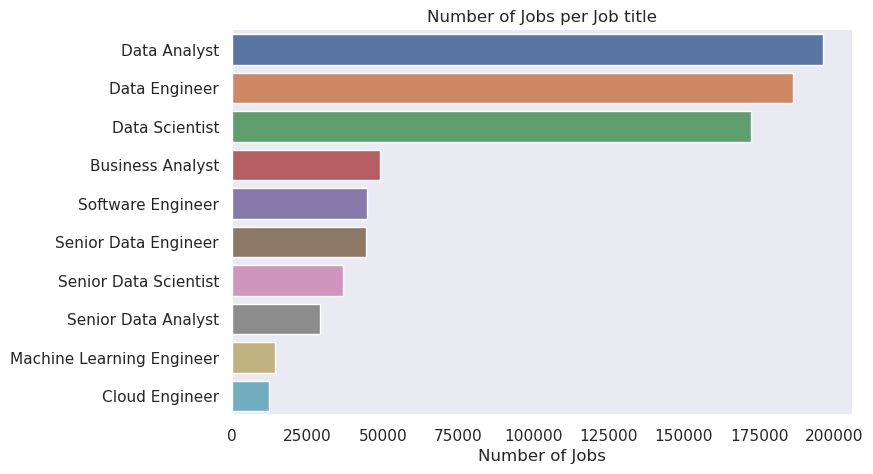

In [2]:
# Roles to explore

# Count jobs per title
df_plot = df['job_title_short'].value_counts().reset_index()

# Plot
sns.set_theme(style= 'dark')
plt.figure(figsize=(8, 5))


sns.barplot(data=df_plot,
            x='count',
            y='job_title_short',
            palette='deep',
            hue='job_title_short')

sns.despine()
plt.title("Number of Jobs per Job title")
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()

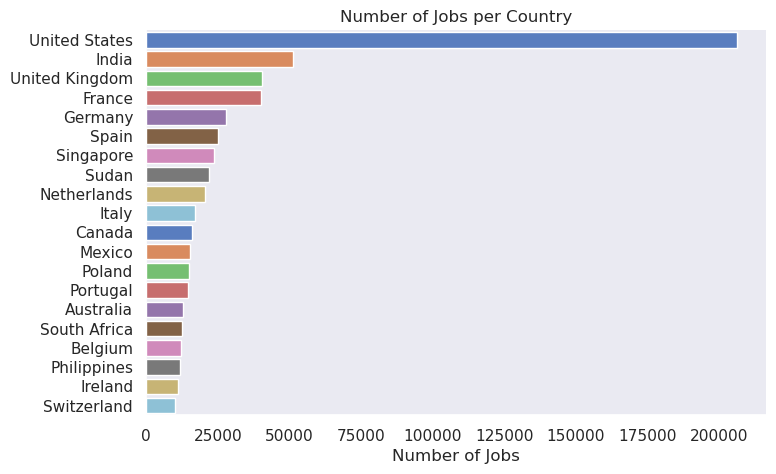

In [3]:

# Countries to explore

df_plot = df['job_country'].value_counts().rename_axis('job_country').reset_index(name='count').head(20)

# plot
sns.set_theme(style= 'dark')
plt.figure(figsize=(8, 5))

sns.barplot(data=df_plot,
            x='count',
            y='job_country',
            hue='job_country',
            palette='muted',
            legend=False)

sns.despine()
plt.title("Number of Jobs per Country")
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()

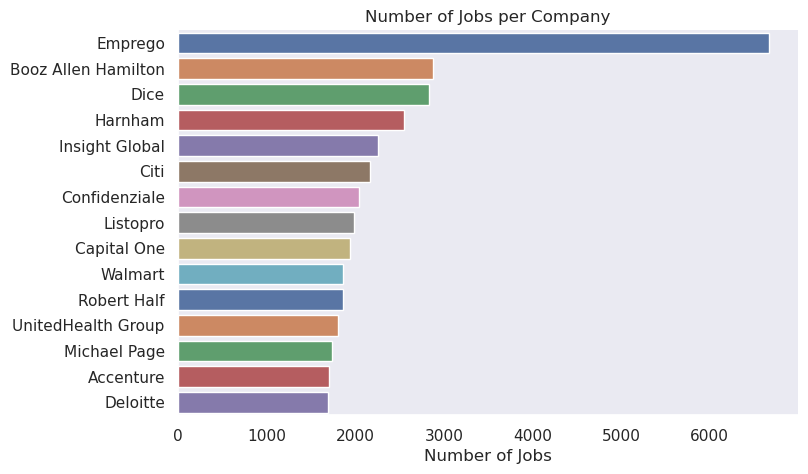

In [4]:
# Companies to explore

df_plot = df['company_name'].value_counts().rename_axis('company_name').reset_index(name='count').head(15)

sns.set_theme(style= 'dark')
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot,
            x='count',
            y='company_name',
            hue='company_name',
            palette='deep',
            legend=False)

sns.despine()
plt.title("Number of Jobs per Company")
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

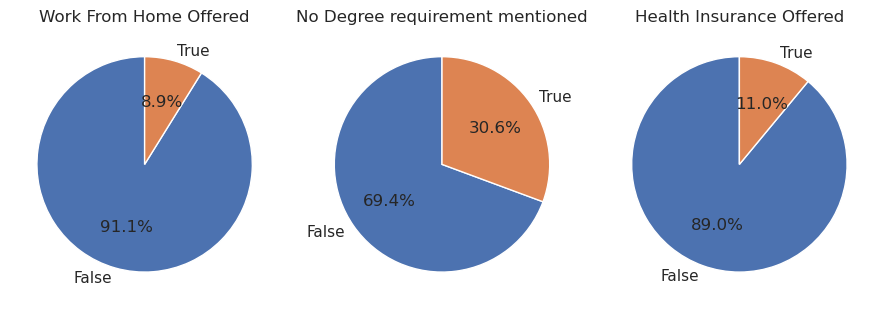

In [11]:
# Job Opportunities

dict_column = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'No Degree requirement mentioned',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize= (9,5))

for i, (column, title) in enumerate(dict_column.items()):
    count = df[column].value_counts().sort_index()

    ax[i].pie(count,
              labels=['False', 'True'],
              autopct='%1.1f%%',
              startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

In [6]:
## Exploratory Data Analysis for Data Analysts in India

# Filter for Data Analyst roles in India

df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')]

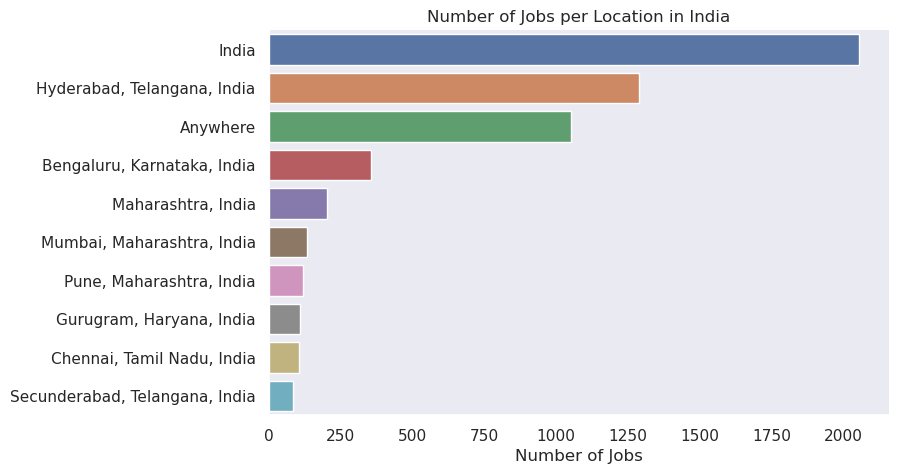

In [7]:
# Locations to Explore:

df_plot = df_DA_India['job_location'].value_counts().reset_index(name='count').head(10)

sns.set_theme(style= 'dark')
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot,
            x='count',
            y='job_location',
            hue='job_location',
            palette='deep',
            legend=False)

sns.despine()
plt.title("Number of Jobs per Location in India")
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()

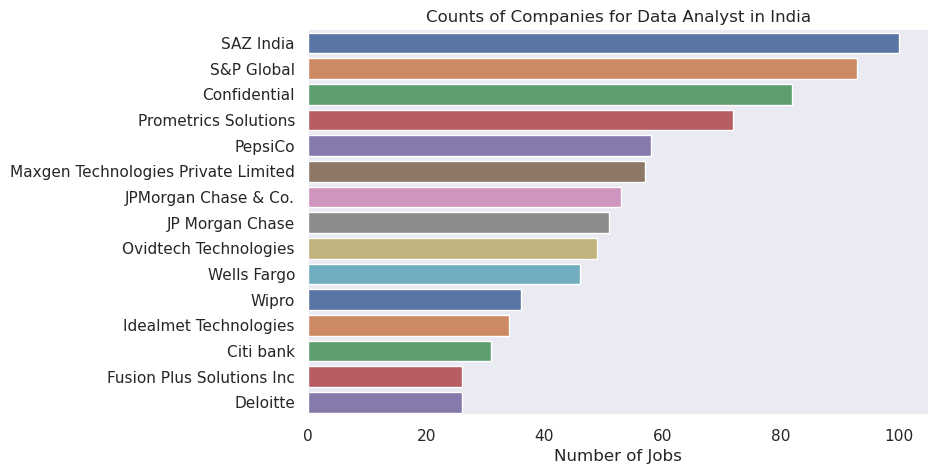

In [8]:
# Companies to Explore:

df_plot = df_DA_India['company_name'].value_counts().reset_index(name='count').head(15)

sns.set_theme(style='dark')
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot,
            x='count',
            y='company_name',
            hue='company_name',
            palette='deep',
            legend=False)

sns.despine()
plt.title('Counts of Companies for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

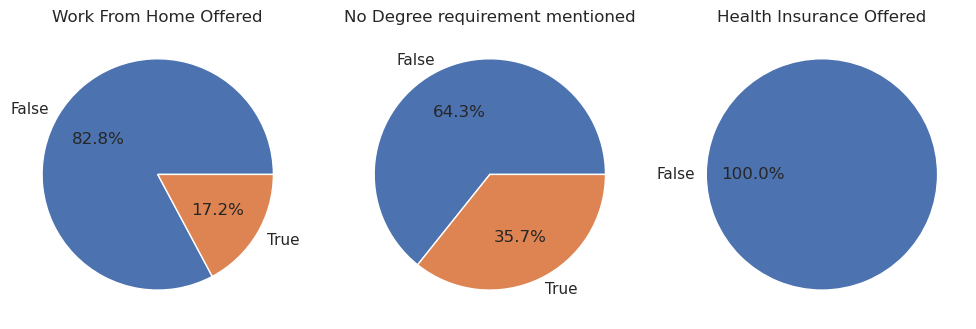

In [9]:
# Job Opportunities

dict_column = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'No Degree requirement mentioned',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize= (10,5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_India[column].value_counts().sort_index()
    ax[i].pie(counts,
              labels= counts.index.astype(str),
              autopct='%1.1f%%',
              startangle=0)

    ax[i].set_title(title)

plt.tight_layout()
plt.show()